In [1]:
import pandas as pd
import numpy as np
import pylab as P
from scipy.cluster.vq import *
import matplotlib.pyplot as plt
%matplotlib inline

userprofile = pd.read_csv("auth_userprofile.csv",quotechar='"',skipinitialspace=True,escapechar='\\')
certificates = pd.read_csv("certificates_generatedcertificate.csv",quotechar='"',skipinitialspace=True,escapechar='\\')
studentmodule = pd.read_csv("courseware_studentmodule_history.csv",quotechar='"',skipinitialspace=True,escapechar='\\')

/usr/local/lib/python2.7/dist-packages/pandas/io/parsers.py:1139: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [2]:
print certificates.course_id.unique() 
course = 'KNU/101/2014_T2'
a = certificates[certificates.course_id == course]
print 'percent=' + str(float(len(a[a.status == 'downloadable']))/len(a)*100) + '%'
print 'dowloadable='+str(len(a[a.status == 'downloadable']))
print 'notpassing='+str(len(a[a.status != 'downloadable']))
print 'all='+str(len(a))

['KPI/Algo101/2014_Fall' 'edX/DemoX/Demo_Course' 'NAUKMA/101/2014_T2'
 'KNU/101/2014_T2' 'KPI/Programming101/2015_T1' 'NaUKMA/TC101/2015_T1'
 'KPI/Algorithms101/2015_Spring' 'KPI/IS101/2014_T1']
percent=11.3040160259%
dowloadable=1185
notpassing=9298
all=10483


In [3]:
cert = certificates[['user_id','grade','course_id','status','name','created_date']]
cert = cert[cert.course_id == 'KNU/101/2014_T2']
users = userprofile[['user_id','name','gender','year_of_birth','level_of_education']]
registered = pd.merge(cert,users,how='inner',on='user_id') #виділення зареєстрованих на курс
certified = registered[registered.status == 'downloadable']              #виділення тих, хто отримав сертифікат

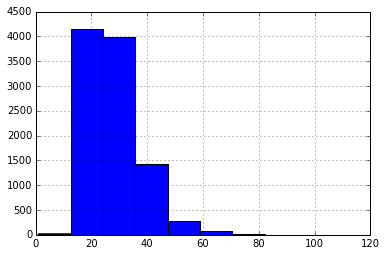

In [5]:
registeredWithAge = registered
registeredWithAge = registeredWithAge.rename(columns = {'year_of_birth':'Age'})
registeredWithAge.Age = 2015 - registeredWithAge.Age
registeredWithAge.Age.hist()
P.show()
#вікова гістограма зареєстрованих на курс користувачів. Всь абсцис - кількість років, ордината - кількість людей даного віку

without age     11
below 20         9
20-24            9
25-29           11
30-34           13
35-39           14
40-44           14
45-49           16
50 and higer    18
dtype: float64

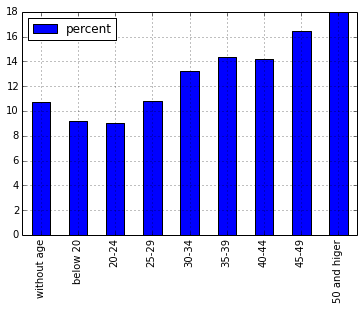

In [34]:
cert = certificates[['user_id','grade','course_id','status','name','created_date']]
cert = cert[cert.course_id == 'KNU/101/2014_T2']
users = users[['user_id','name','gender','year_of_birth','level_of_education']]
registered = pd.merge(cert,users,how='inner',on='user_id')

import time
registered['create_year'] = registered.created_date.apply(lambda x: time.strptime(x,'%Y-%m-%d %H:%M:%S').tm_year)
registered = registered.rename(columns = {'year_of_birth':'Age'})
registered.Age = registered.create_year - registered.Age
certified = registered[registered.status == 'downloadable']

notsetAge = registered[registered.Age.isnull()]
withAge = registered[registered.Age.notnull()]
certNoAge = certified[certified.Age.isnull()]
certAge = certified[certified.Age.notnull()]

registeredGroups = pd.Series([len(notsetAge)],index=['without age'])
certifiedGroups = pd.Series([len(certNoAge)],index=['without age'])
registeredGroups.set_value('below 20',len(withAge[withAge.Age < 20]))
certifiedGroups.set_value('below 20',len(certAge[certAge.Age < 20]))

for i in range(0,6):
    begin, end = 20+i*5, 20+(i+1)*5
    registeredGroups.set_value(str(begin) + '-' + str(end-1),len(withAge.Age[withAge.Age >= begin ][withAge.Age < end]))
    certifiedGroups.set_value(str(begin) + '-' + str(end-1),len(certAge.Age[certAge.Age >= begin ][certAge.Age < end]))

registeredGroups.set_value('50 and higer',len(withAge[withAge.Age >= 50]))
certifiedGroups.set_value('50 and higer',len(certAge[certAge.Age >= 50]))
plot_data = pd.concat([registeredGroups,certifiedGroups],axis=1,keys=['registered','passed'])
plot_data['name'] = plot_data.index
plot_data = pd.concat([pd.Series(registeredGroups.index,index=registeredGroups.index), certifiedGroups / registeredGroups * 100],axis=1,keys=['index','percent'])
plot_data.plot(kind='bar')

"""
fig, ax = plt.subplots()
ind = np.arange(len(plot_data.index))
width = 0.35
rects1 = ax.bar(ind, plot_data.values, width, color='r')
ax.set_ylabel('Passed  per group')
ax.set_title('Percent, %')
ax.set_xticks(ind+width)
ax.set_xticklabels(plot_data.index.tolist())
plt.show()
"""
(certifiedGroups / registeredGroups * 100).apply(lambda x: round(x))

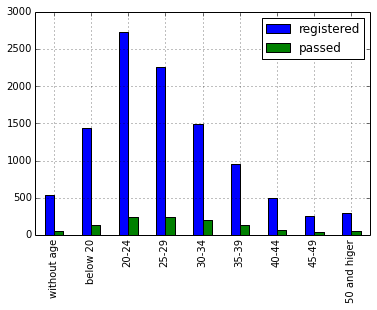

In [112]:
registeredGroups = pd.Series([len(notsetAge)],index=['without age'])
certifiedGroups = pd.Series([len(certNoAge)],index=['without age'])
registeredGroups.set_value('below 20',len(withAge[withAge.Age < 20]))
certifiedGroups.set_value('below 20',len(certAge[certAge.Age < 20]))
for i in range(0,6):
    begin, end = 20+i*5, 20+(i+1)*5
    registeredGroups.set_value(str(begin) + '-' + str(end-1),len(withAge.Age[withAge.Age >= begin ][withAge.Age < end]))
    certifiedGroups.set_value(str(begin) + '-' + str(end-1),len(certAge.Age[certAge.Age >= begin ][certAge.Age < end]))
registeredGroups.set_value('50 and higer',len(withAge[withAge.Age >= 50]))
certifiedGroups.set_value('50 and higer',len(certAge[certAge.Age >= 50]))

#registeredGroups.plot(kind='bar')
pd.concat([registeredGroups,certifiedGroups],axis=1,keys=['registered','passed']).plot(kind='bar')

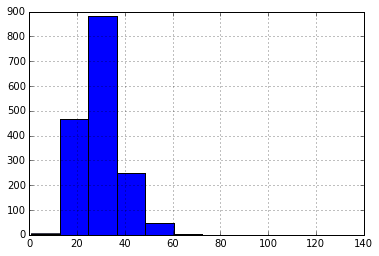

In [78]:
certifiedWithAge = certified 
certifiedWithAge = certifiedWithAge.rename(columns = {'year_of_birth':'Age'})
certifiedWithAge.Age = 2015 - certifiedWithAge.Age
certifiedWithAge.Age.hist()
P.show()
#вікова гісторнама для тих, хто завершив курс

In [79]:
#divide existing dataset on clusters
notsetAge = certifiedWithAge[certifiedWithAge.Age.isnull()]
withAge = certifiedWithAge[certifiedWithAge.Age.notnull()]

without age      77
below 20         69
20-24           400
25-29           433
30-34           344
35-39           199
40-44            98
45-49            77
50 and higer     35
dtype: int64

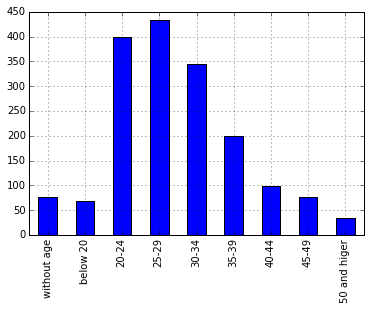

In [80]:
certifiedGroups = pd.Series([len(notsetAge)],index=['without age'])
certifiedGroups.set_value('below 20',len(withAge[withAge.Age < 20]))
for i in range(0,6):
    begin, end = 20+i*5, 20+(i+1)*5
    certifiedGroups.set_value(str(begin) + '-' + str(end-1),len(withAge.Age[withAge.Age >= begin ][withAge.Age < end]))
certifiedGroups.set_value('50 and higer',len(withAge[withAge.Age >= 50]))

certifiedGroups.plot(kind='bar')
certifiedGroups

without age     0.102530
below 20        0.066796
20-24           0.100730
25-29           0.108958
30-34           0.112861
35-39           0.109101
40-44           0.105150
45-49           0.177829
50 and higer    0.101156
dtype: float64

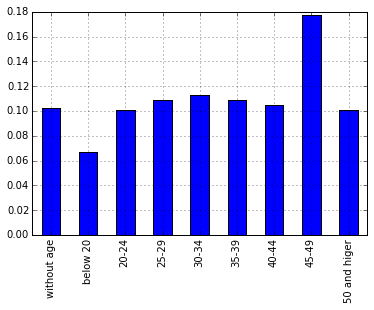

In [81]:
certifiedPersent = pd.Series(certifiedGroups.values.astype(float)/registeredGroups.values.astype(float), index=registeredGroups.index.values)
certifiedPersent.plot(kind='bar')
certifiedPersent

Позначення рівня освіти на графіках:
- level_of_education:
- "p" - кандидатський чи докторський ступінь
- "m" - магістр
- "b" - бакалавр
- "a" - незакінчена вища освіта
- "hs" - середня освіта
- "jhs" - професійно-технічна освіта
- "el" - початкова освіта
- "none" - немає
- "other" - інше


In [26]:
registered = pd.merge(cert,users,how='inner',on='user_id').fillna('missed')
certified = registered[registered.status == 'downloadable']

registered.groupby('level_of_education').count().ix[:,0].plot(kind='bar')

level_of_education
a                     1555
b                     1161
el                     161
hs                    1100
jhs                    167
m                     5518
missed                 354
none                    60
other                   97
p                      310
Name: user_id, dtype: int64

                    count
level_of_education       
a                    2242
b                    1874
el                     77
hs                    848
jhs                   250
m                   10090
none                   26
other                  71
p                     441


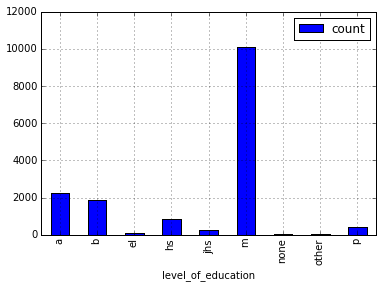

In [82]:
edu_reg_dist = registered.groupby('level_of_education').agg(['count'])['id_x']
print edu_reg_dist
edu_reg_dist.plot(kind='bar')

                    count
level_of_education       
a                     196
b                     160
el                      4
hs                     60
jhs                    31
m                    1151
none                    2
other                  10
p                      67


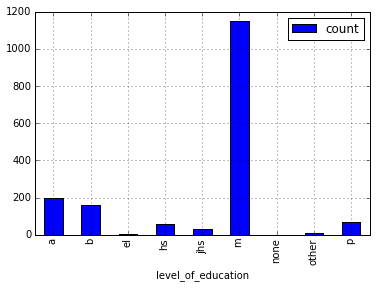

In [83]:
edu_fin_dist = certified.groupby('level_of_education').agg(['count'])['id_x']
print edu_fin_dist
edu_fin_dist.plot(kind='bar')

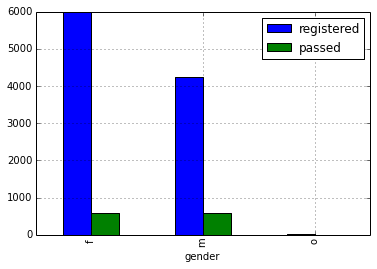

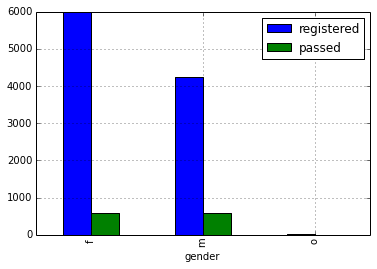

In [16]:
cert = certificates[['user_id','grade','course_id','status','name','created_date']]
cert = cert[cert.course_id == 'KNU/101/2014_T2']
users = users[['user_id','name','gender','year_of_birth','level_of_education']]
registered = pd.merge(cert,users,how='inner',on='user_id').dropna(subset=['gender'])
certified = registered[registered.status == 'downloadable']

registeredGroups =registered.groupby('gender').count().ix[:,0]
certifiedGroups = certified.groupby('gender').count().ix[:,0]

plot_data = pd.concat([registeredGroups,certifiedGroups],axis=1,keys=['registered','passed'])

plot_data.plot(kind='bar').figure
#certifiedGroups.plot(kind='pie')

In [19]:
registered[registered.gender == 'o']

,user_id,grade,course_id,status,name_x,created_date,name_y,gender,year_of_birth,level_of_education
1343,1936,0.00,KNU/101/2014_T2,notpassing,Anna Shcherbak,2015-01-14 23:51:46,Anna Shcherbak,o,1993,b
1504,6852,0.08,KNU/101/2014_T2,notpassing,Наталія Гловер,2015-01-14 23:52:09,Наталія Гловер,o,1987,m
2000,8938,0.95,KNU/101/2014_T2,downloadable,OksanaGannoha,2015-01-14 23:53:18,OksanaGannoha,o,1967,m
2152,9587,0.00,KNU/101/2014_T2,notpassing,Юля Ключук,2015-01-14 23:53:42,Юля Ключук,o,NaN,NaN
2379,9922,0.00,KNU/101/2014_T2,notpassing,Eimrined Eimrines,2015-01-14 23:54:10,Eimrined Eimrines,o,2014,none
2490,10975,0.00,KNU/101/2014_T2,notpassing,Ljudmila Imka,2015-01-14 23:54:22,Ljudmila Imka,o,1965,m
3159,13704,0.00,KNU/101/2014_T2,notpassing,Jane Doe,2015-01-14 23:55:45,Jane Doe,o,1987,hs
4987,21031,0.00,KNU/101/2014_T2,notpassing,ЛесяТарасюк,2015-01-14 23:59:36,ЛесяТарасюк,o,1982,m
7535,31421,0.00,KNU/101/2014_T2,notpassing,Іванова Олександра,2015-01-15 00:05:32,Іванова Олександра,o,1990,m
9092,37487,0.00,KNU/101/2014_T2,notpassing,Malik 88,2015-01-15 00:09:18,Malik 88,o,1992,other


In [19]:
from datetime import datetime

In [36]:
registered = users[['user_id','name','gender','year_of_birth','level_of_education']]
registeredGroups =registered.groupby('gender').count().ix[:,0]

plot_data = pd.concat([pd.DataFrame(registeredGroups.index,index=registeredGroups.index),registeredGroups],axis=1).fillna(0)
plot_data.columns = ['name','value']
plot_data = plot_data[plot_data.name != 'o']

plot_data

,name,value
gender,,
f,f,38129
m,m,40278


In [33]:
pd.concat([pd.DataFrame(registeredGroups.index,index=registeredGroups.index),registeredGroups],axis=1)#.fillna(0)

,gender,user_id
gender,,
f,f,38129
m,m,40278
o,o,138


In [53]:
sm = studentmodule
problems = sm[sm.module_type == 'problem']
a = problems.groupby('module_id').count().ix[:,0]
b = problems.groupby('module_id').apply(lambda x: x.created.min())
pd.concat([a,b],axis=1,keys=['num','date']).sort('date').num

module_id
i4x://KNU/101/problem/e39129c796754099b0974db74c5b5b01    6260
i4x://KNU/101/problem/43dbbb5417294a0faa1c43f02473e7ec    3698
i4x://KNU/101/problem/84d4314a7fd041f59e9219de9b4e7cd0    3035
i4x://KNU/101/problem/7ac56261c85548fd97ae8a56e5a355f6    2694
i4x://KNU/101/problem/b9daef58e5884fa8b0c36c5c9bd233ce    2283
i4x://KNU/101/problem/7fb5b2515e09416f9977f465f909a746    1896
i4x://KNU/101/problem/e663ed76dc9445dead9354a158daf163    1695
Name: num, dtype: int64

In [8]:
studentmodule.state

0     {"correct_map": {"i4x-KNU-101-problem-e39129c7...
1     {"seed": 1, "input_state": {"i4x-KNU-101-probl...
2     {"correct_map": {"i4x-KNU-101-problem-e39129c7...
3     {"seed": 1, "input_state": {"i4x-KNU-101-probl...
4     {"seed": 1, "input_state": {"i4x-KNU-101-probl...
5     {"correct_map": {"i4x-KNU-101-problem-e39129c7...
6     {"correct_map": {"i4x-KNU-101-problem-e39129c7...
7     {"correct_map": {"i4x-KNU-101-problem-e39129c7...
8     {"correct_map": {"i4x-KNU-101-problem-e39129c7...
9     {"seed": 1, "input_state": {"i4x-KNU-101-probl...
10    {"seed": 1, "input_state": {"i4x-KNU-101-probl...
11    {"seed": 1, "input_state": {"i4x-KNU-101-probl...
12    {"correct_map": {"i4x-KNU-101-problem-e39129c7...
13    {"correct_map": {"i4x-KNU-101-problem-e39129c7...
14    {"correct_map": {"i4x-KNU-101-problem-e39129c7...
...
92100    {"seed": 1, "input_state": {"i4x-KNU-101-probl...
92101    {"seed": 1, "input_state": {"i4x-KNU-101-probl...
92102    {"seed": 1, "input_state": {"

In [10]:
import time
import datetime
studentmodule.created.apply(lambda x: datetime.datetime.fromtimestamp(time.mktime(time.strptime(x,'%Y-%m-%d %H:%M:%S'))))

0    2014-11-18 18:28:45
1    2014-11-18 20:44:12
2    2014-11-19 09:02:42
3    2014-11-19 09:05:22
4    2014-11-19 09:07:53
5    2014-11-19 09:08:00
6    2014-11-19 09:08:06
7    2014-11-19 09:08:26
8    2014-11-19 09:08:46
9    2014-11-19 09:09:05
10   2014-11-19 09:09:10
11   2014-11-19 09:09:20
12   2014-11-19 09:09:30
13   2014-11-19 09:09:44
14   2014-11-19 09:11:13
...
92100   2015-01-20 14:09:34
92101   2015-01-20 14:15:41
92102   2015-01-20 14:25:20
92103   2015-01-20 14:25:27
92104   2015-01-20 14:41:20
92105   2015-01-20 14:43:19
92106   2015-01-20 14:48:39
92107   2015-01-20 15:17:08
92108   2015-01-20 15:25:43
92109   2015-01-20 15:44:58
92110   2015-01-20 15:46:50
92111   2015-01-20 15:47:15
92112   2015-01-20 16:21:20
92113   2015-01-20 16:48:49
92114   2015-01-20 17:14:59
Name: created, Length: 92115, dtype: datetime64[ns]